In [1]:
import sys
print(sys.executable)
!{sys.executable} -m pip install mplsoccer matplotlib seaborn kloppy

/Users/adrianmuller/miniconda3/envs/soccer-analytics/bin/python
     |████████████████████████████████| 58 kB 6.0 MB/s eta 0:00:011
     |████████████████████████████████| 134 kB 8.4 MB/s eta 0:00:01
  Using cached lxml-4.8.0-cp39-cp39-macosx_10_15_x86_64.whl (4.6 MB)
  Created wheel for mplsoccer: filename=mplsoccer-1.0.6-py3-none-any.whl size=62946 sha256=9c7ff3ddb54fcfbe17b33780f87f3012b0febb303bd4c361897dad8cfdf7beeb
  Stored in directory: /Users/adrianmuller/Library/Caches/pip/wheels/39/da/4a/9f5acb3192ffb55d968a5336ae53cc22bf3cfd12b85dc0c58b
Successfully built mplsoccer


In [2]:
from kloppy import statsbomb
import bz2
from mplsoccer.pitch import Pitch

dataset = statsbomb.load(
    event_data=bz2.open("/Users/adrianmuller/Desktop/soccer-analytics-repo/data/statsbomb360/events/3788747.json.bz2"),
    lineup_data="/Users/adrianmuller/Desktop/soccer-analytics-repo/data/statsbomb360/lineups/3788747.json",
    
    # Optional arguments
    coordinates="statsbomb",
    event_types=["shot"] # shots only, for now
    #event_types=["pass", "shot"]
)

home_team, away_team = dataset.metadata.teams

In [6]:
df_away = (
    dataset
    .filter(lambda x: x.ball_owning_team == away_team)
    .to_pandas()
)
df_home = (
    dataset
    .filter(lambda x: x.ball_owning_team == home_team)
    .to_pandas()
)

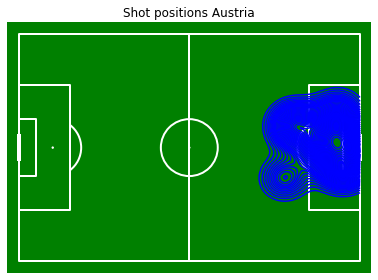

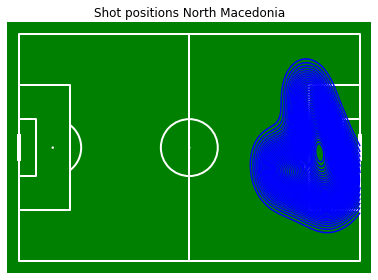

In [24]:
pitch = Pitch(pitch_color='g', line_zorder=1, line_color='white', pitch_type="statsbomb")
fig, ax = pitch.draw()
ax.set_title('Shot positions ' + home_team.name)
plot = pitch.kdeplot(
    df_home["coordinates_x"],
    df_home["coordinates_y"],
    ax=ax,
    shade=False,
    n_levels=50,
    color='b'
)

pitch = Pitch(pitch_color='g', line_zorder=1, line_color='white', pitch_type="statsbomb")
fig, ax = pitch.draw()
ax.set_title('Shot positions ' + away_team.name)
plot = pitch.kdeplot(
    df_away["coordinates_x"],
    df_away["coordinates_y"],
    ax=ax,
    shade=False,
    n_levels=50,
    color='b'
)